# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#Observations
---------------------

* 1) We can see from our regression analysis that there are strong correlations between latitude and temperature.
------------------------------------------------------------------------------------------------------------------------------
* 2) We can see from the regression analysis that there is correlation between latitude and the other relationships, but they have weak correlation. While latitude might have some impact, there are several other geographical factors that might have a greater impact.
------------------------------------------------------------------------------------------------------------------------------
* 3) The number of cities greatly favored the Northern Hemisphere data. This was due to randomly generating the latitude coordinates at the beginning of the code. I feel like we got a more accurate sample of Northern Hemisphere weather data when compared to Southern Hemisphere data. We could run the code a few more times or at greater quantity to see how the data might have changed.


In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import requests
import json
from api_keys import weather_api_key
from citipy import citipy
import random
import decimal
import time

## Generate Cities List

In [19]:
#set up latitude and longitude lists
latitude_list = []
longitude_list = []

# Generate 5000 random latitude and logitude values and add them to there respective list
for x in range(0, 5000):
    latitude = float(decimal.Decimal(random.randrange(-9000, 9000))/100)
    longitude = float(decimal.Decimal(random.randrange(-18000, 18000))/100)
    latitude_list.append(latitude)
    longitude_list.append(longitude)

# Set up the Weather DF
weather_df = pd.DataFrame({"Latitude": latitude_list, "Longitude": longitude_list})

# set up list to hold city names and what there country there from
city_list = []
country_list = []

# goes through each value of Latitude and Longitude in the Weather DF and uses the value as inputs to determin there city and country
for a in range(0, len(weather_df["Latitude"])):
    lat_value = weather_df.iloc[a]["Latitude"]
    long_value = weather_df.iloc[a]["Longitude"]    
    city_cord = citipy.nearest_city(lat_value, long_value)
    city_name = city_cord.city_name
    city_list.append(city_name)
    country = city_cord.country_code
    country_list.append(country)

    
# adds the city and country lists into our weather data frame, and then a touch of formatting   
weather_df["City"] = city_list
weather_df["Country"] = country_list
weather_df["City"] = weather_df["City"].str.title()
weather_df["Country"] = weather_df["Country"].str.upper()


#drop duplicates duplicates
weather_df = weather_df.drop_duplicates(subset=["City", "Country"], keep="first")
weather_df = weather_df.reset_index(drop=True)

print("Total number of unique cities in weather dataframe is: " + str(len(weather_df.index)))


Total number of unique cities in weather dataframe is: 1381


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
# Set up list for variables we want
temperature_list = [] 
humidity_list = []
cloudiness_list = []
wind_speed_list = []
date_list = []
latitude_list_v2 = []
longitude_list_v2 = []
city_list_v2 = []
country_list_v2 = []

# Base URL before adding variable componets
url = "http://api.openweathermap.org/data/2.5/weather?"

    

for target in range(0, len(weather_df.index)):
    
    # Select city on weather DF, and formate for proper url code in event city has spaces in name
    display_city = weather_df.iloc[target]["City"]
    display_country = weather_df.iloc[target]["Country"]
    target_city = weather_df.iloc[target]["City"]
    target_city = target_city.replace(" ","+")
    
    # Build query URL
    query_url = f"{url}appid={weather_api_key}&q={target_city}&units=imperial"
    
    # Use URL to make a request of information, bring back in the json format, and print URL
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    print(f"Currently on {(target + 1)} out of {(len(weather_df.index))} |::| City: {display_city}, {display_country}")
    print(query_url)
    
    # This will collect and store desired information, but if there is an error it will print a line and move on to next
    try:
        cities_temp = weather_json["main"]["temp"]
        temperature_list.append(cities_temp)
        
        cities_humid = weather_json["main"]["humidity"]
        humidity_list.append(cities_humid)
        
        cities_cloud = weather_json["clouds"]["all"]
        cloudiness_list.append(cities_cloud)
        
        cities_wind = weather_json["wind"]["speed"]
        wind_speed_list.append(cities_wind)
        
        cities_date = weather_json["dt"]
        date_list.append(cities_date)
        
        cities_lat_update = weather_json["coord"]["lat"]
        latitude_list_v2.append(cities_lat_update)
        
        cities_long_update = weather_json["coord"]["lon"]
        longitude_list_v2.append(cities_long_update)
        
        cities_city_update = weather_json["name"]
        city_list_v2.append(cities_city_update)
        
        cities_con_update = weather_json["sys"]["country"]       
        country_list_v2.append(cities_con_update)
        
    except:
        print("I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.")
        
        # Usuccessful API request will result in a blank value in list that will throw off list alignment
        # We will but in a dummy value in its place to clean out later
        temperature_list.append("Error")
        humidity_list.append("Error")
        cloudiness_list.append("Error")
        wind_speed_list.append("Error")
        date_list.append("Error")
        latitude_list_v2.append("Error")
        longitude_list_v2.append("Error")
        city_list_v2.append("Error")
        country_list_v2.append("Error")
        
        
    print()
    
    # Add a sleep timer to prevent my API requests from going over 60 per min and causing a 1 hour lock out.
    time.sleep(1) # in seconds



Currently on 1 out of 1381 |::| City: Luau, AO
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Luau&units=imperial

Currently on 2 out of 1381 |::| City: Louisbourg, CA
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Louisbourg&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 3 out of 1381 |::| City: Atuona, PF
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Atuona&units=imperial

Currently on 4 out of 1381 |::| City: Ilulissat, GL
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Ilulissat&units=imperial

Currently on 5 out of 1381 |::| City: Albany, AU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Albany&units=imperial

Currently on 6 out of 1381 |::| City: Port Elizabeth, ZA
http://api.openweathermap.org/data/2.5/w

Currently on 49 out of 1381 |::| City: Victoria, SC
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Victoria&units=imperial

Currently on 50 out of 1381 |::| City: Airai, PW
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Airai&units=imperial

Currently on 51 out of 1381 |::| City: Bambous Virieux, MU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Bambous+Virieux&units=imperial

Currently on 52 out of 1381 |::| City: Saint-Philippe, RE
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Saint-Philippe&units=imperial

Currently on 53 out of 1381 |::| City: Qaanaaq, GL
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Qaanaaq&units=imperial

Currently on 54 out of 1381 |::| City: Navrongo, GH
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Navrongo&units=im

Currently on 98 out of 1381 |::| City: Taolanaro, MG
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Taolanaro&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 99 out of 1381 |::| City: Necochea, AR
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Necochea&units=imperial

Currently on 100 out of 1381 |::| City: Vetovo, BG
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Vetovo&units=imperial

Currently on 101 out of 1381 |::| City: Rundu, NA
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Rundu&units=imperial

Currently on 102 out of 1381 |::| City: Souillac, MU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Souillac&units=imperial

Currently on 103 out of 1381 |::| City: Nikolskoye, RU
http://api.openweathermap.org/da

Currently on 144 out of 1381 |::| City: Turukhansk, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Turukhansk&units=imperial

Currently on 145 out of 1381 |::| City: Puerto Escondido, MX
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Puerto+Escondido&units=imperial

Currently on 146 out of 1381 |::| City: Nampula, MZ
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Nampula&units=imperial

Currently on 147 out of 1381 |::| City: Chaykovskiy, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Chaykovskiy&units=imperial

Currently on 148 out of 1381 |::| City: Grand River South East, MU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Grand+River+South+East&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 149 out of 1

Currently on 190 out of 1381 |::| City: Burgeo, CA
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Burgeo&units=imperial

Currently on 191 out of 1381 |::| City: Cap Malheureux, MU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Cap+Malheureux&units=imperial

Currently on 192 out of 1381 |::| City: Cabo San Lucas, MX
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Cabo+San+Lucas&units=imperial

Currently on 193 out of 1381 |::| City: Mahajanga, MG
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Mahajanga&units=imperial

Currently on 194 out of 1381 |::| City: Marsh Harbour, BS
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Marsh+Harbour&units=imperial

Currently on 195 out of 1381 |::| City: Maragogi, BR
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501

Currently on 239 out of 1381 |::| City: Kaitangata, NZ
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Kaitangata&units=imperial

Currently on 240 out of 1381 |::| City: Samarai, PG
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Samarai&units=imperial

Currently on 241 out of 1381 |::| City: Bud, NO
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Bud&units=imperial

Currently on 242 out of 1381 |::| City: Ola, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Ola&units=imperial

Currently on 243 out of 1381 |::| City: Birao, CF
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Birao&units=imperial

Currently on 244 out of 1381 |::| City: Padang, ID
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Padang&units=imperial

Currently on 245 out of 1381 |::

Currently on 287 out of 1381 |::| City: San Patricio, MX
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=San+Patricio&units=imperial

Currently on 288 out of 1381 |::| City: Guerrero Negro, MX
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Guerrero+Negro&units=imperial

Currently on 289 out of 1381 |::| City: Tortoli, IT
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Tortoli&units=imperial

Currently on 290 out of 1381 |::| City: Port Hedland, AU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Port+Hedland&units=imperial

Currently on 291 out of 1381 |::| City: Lagoa, PT
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Lagoa&units=imperial

Currently on 292 out of 1381 |::| City: Villa Bruzual, VE
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Vill

Currently on 336 out of 1381 |::| City: Bhag, PK
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Bhag&units=imperial

Currently on 337 out of 1381 |::| City: Ocean City, US
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Ocean+City&units=imperial

Currently on 338 out of 1381 |::| City: Karoti, GR
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Karoti&units=imperial

Currently on 339 out of 1381 |::| City: Lahaina, US
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Lahaina&units=imperial

Currently on 340 out of 1381 |::| City: Owando, CG
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Owando&units=imperial

Currently on 341 out of 1381 |::| City: Klaksvik, FO
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Klaksvik&units=imperial

Currently on 342 o

Currently on 382 out of 1381 |::| City: Port Hardy, CA
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Port+Hardy&units=imperial

Currently on 383 out of 1381 |::| City: Pangody, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Pangody&units=imperial

Currently on 384 out of 1381 |::| City: Tarko-Sale, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Tarko-Sale&units=imperial

Currently on 385 out of 1381 |::| City: Isabela, US
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Isabela&units=imperial

Currently on 386 out of 1381 |::| City: Tura, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Tura&units=imperial

Currently on 387 out of 1381 |::| City: Saint-Francois, GP
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Saint-Francois&units=imperi

Currently on 431 out of 1381 |::| City: Fevralsk, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Fevralsk&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 432 out of 1381 |::| City: Mandalgovi, MN
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Mandalgovi&units=imperial

Currently on 433 out of 1381 |::| City: Narrabri, AU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Narrabri&units=imperial

Currently on 434 out of 1381 |::| City: Mutare, ZW
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Mutare&units=imperial

Currently on 435 out of 1381 |::| City: Natal, BR
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Natal&units=imperial

Currently on 436 out of 1381 |::| City: Komsomolskiy, RU
http://api.openweathermap.

Currently on 478 out of 1381 |::| City: Howard Springs, AU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Howard+Springs&units=imperial

Currently on 479 out of 1381 |::| City: Rorvik, NO
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Rorvik&units=imperial

Currently on 480 out of 1381 |::| City: Togur, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Togur&units=imperial

Currently on 481 out of 1381 |::| City: Nelson Bay, AU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Nelson+Bay&units=imperial

Currently on 482 out of 1381 |::| City: Svay Rieng, KH
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Svay+Rieng&units=imperial

Currently on 483 out of 1381 |::| City: Linhares, BR
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Linhares&units=impe

Currently on 525 out of 1381 |::| City: Ous, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Ous&units=imperial

Currently on 526 out of 1381 |::| City: Omsukchan, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Omsukchan&units=imperial

Currently on 527 out of 1381 |::| City: Pingliang, CN
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Pingliang&units=imperial

Currently on 528 out of 1381 |::| City: Vostok, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Vostok&units=imperial

Currently on 529 out of 1381 |::| City: Burica, PA
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Burica&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 530 out of 1381 |::| City: Chongwe, ZM
http://api.openweathermap.org/data/2.5/

Currently on 573 out of 1381 |::| City: Dergachi, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Dergachi&units=imperial

Currently on 574 out of 1381 |::| City: Lima, PE
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Lima&units=imperial

Currently on 575 out of 1381 |::| City: Pringsewu, ID
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Pringsewu&units=imperial

Currently on 576 out of 1381 |::| City: Qui Nhon, VN
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Qui+Nhon&units=imperial

Currently on 577 out of 1381 |::| City: Newcastle, AU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Newcastle&units=imperial

Currently on 578 out of 1381 |::| City: Belmonte, BR
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Belmonte&units=imperial

Currentl

Currently on 621 out of 1381 |::| City: Rungata, KI
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Rungata&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 622 out of 1381 |::| City: Barahona, DO
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Barahona&units=imperial

Currently on 623 out of 1381 |::| City: Rio Branco, BR
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Rio+Branco&units=imperial

Currently on 624 out of 1381 |::| City: Zachagansk, KZ
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Zachagansk&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 625 out of 1381 |::| City: Pucallpa, PE
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Puc

Currently on 668 out of 1381 |::| City: Erenhot, CN
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Erenhot&units=imperial

Currently on 669 out of 1381 |::| City: Skiros, GR
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Skiros&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 670 out of 1381 |::| City: Redmond, US
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Redmond&units=imperial

Currently on 671 out of 1381 |::| City: Manvi, IN
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Manvi&units=imperial

Currently on 672 out of 1381 |::| City: Tual, ID
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Tual&units=imperial

Currently on 673 out of 1381 |::| City: Viligili, MV
http://api.openweathermap.org/data/2.5/weather

Currently on 714 out of 1381 |::| City: Sobolevo, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Sobolevo&units=imperial

Currently on 715 out of 1381 |::| City: Lyubokhna, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Lyubokhna&units=imperial

Currently on 716 out of 1381 |::| City: Dalaba, GN
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Dalaba&units=imperial

Currently on 717 out of 1381 |::| City: Barcelos, BR
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Barcelos&units=imperial

Currently on 718 out of 1381 |::| City: Vila Do Maio, CV
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Vila+Do+Maio&units=imperial

Currently on 719 out of 1381 |::| City: Sarasota, US
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Sarasota&units=imperial

Currently on 763 out of 1381 |::| City: Ingham, AU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Ingham&units=imperial

Currently on 764 out of 1381 |::| City: Milkovo, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Milkovo&units=imperial

Currently on 765 out of 1381 |::| City: Salinopolis, BR
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Salinopolis&units=imperial

Currently on 766 out of 1381 |::| City: Yerbogachen, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Yerbogachen&units=imperial

Currently on 767 out of 1381 |::| City: Hami, CN
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Hami&units=imperial

Currently on 768 out of 1381 |::| City: Sao Felix Do Xingu, BR
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Sao+Felix+Do+Xingu&un

Currently on 810 out of 1381 |::| City: Kananga, CD
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Kananga&units=imperial

Currently on 811 out of 1381 |::| City: Shakawe, BW
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Shakawe&units=imperial

Currently on 812 out of 1381 |::| City: Kabinda, CD
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Kabinda&units=imperial

Currently on 813 out of 1381 |::| City: Saint-Georges, GF
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Saint-Georges&units=imperial

Currently on 814 out of 1381 |::| City: Santa Cruz De Tenerife, ES
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Santa+Cruz+De+Tenerife&units=imperial

Currently on 815 out of 1381 |::| City: Mpulungu, ZM
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501

Currently on 858 out of 1381 |::| City: Sabang, ID
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Sabang&units=imperial

Currently on 859 out of 1381 |::| City: Alekseyevsk, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Alekseyevsk&units=imperial

Currently on 860 out of 1381 |::| City: San Carlos, PY
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=San+Carlos&units=imperial

Currently on 861 out of 1381 |::| City: Shchelyayur, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Shchelyayur&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 862 out of 1381 |::| City: Mumbwa, ZM
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Mumbwa&units=imperial

Currently on 863 out of 1381 |::| City: Mitu, CO
http://api.openweath

Currently on 905 out of 1381 |::| City: Halifax, CA
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Halifax&units=imperial

Currently on 906 out of 1381 |::| City: Kinanah, SD
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Kinanah&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 907 out of 1381 |::| City: Mocambique, MZ
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Mocambique&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 908 out of 1381 |::| City: La Seyne-Sur-Mer, FR
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=La+Seyne-Sur-Mer&units=imperial

Currently on 909 out of 1381 |::| City: Porkhov, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f

Currently on 953 out of 1381 |::| City: Clovis, US
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Clovis&units=imperial

Currently on 954 out of 1381 |::| City: Tanete, ID
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Tanete&units=imperial

Currently on 955 out of 1381 |::| City: Podporozhye, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Podporozhye&units=imperial

Currently on 956 out of 1381 |::| City: Biga, TR
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Biga&units=imperial

Currently on 957 out of 1381 |::| City: Chau Doc, VN
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Chau+Doc&units=imperial

Currently on 958 out of 1381 |::| City: Tahlequah, US
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Tahlequah&units=imperial

Currently on

Currently on 1002 out of 1381 |::| City: Lewistown, US
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Lewistown&units=imperial

Currently on 1003 out of 1381 |::| City: Outjo, NA
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Outjo&units=imperial

Currently on 1004 out of 1381 |::| City: Pousat, KH
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Pousat&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 1005 out of 1381 |::| City: Les Cayes, HT
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Les+Cayes&units=imperial

Currently on 1006 out of 1381 |::| City: Xiongshi, CN
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Xiongshi&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try t

Currently on 1049 out of 1381 |::| City: Adrasmon, TJ
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Adrasmon&units=imperial

Currently on 1050 out of 1381 |::| City: Kulhudhuffushi, MV
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Kulhudhuffushi&units=imperial

Currently on 1051 out of 1381 |::| City: Muros, ES
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Muros&units=imperial

Currently on 1052 out of 1381 |::| City: Lucea, JM
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Lucea&units=imperial

Currently on 1053 out of 1381 |::| City: Quatre Cocos, MU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Quatre+Cocos&units=imperial

Currently on 1054 out of 1381 |::| City: Hunza, PK
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Hunza&units=imperi

Currently on 1096 out of 1381 |::| City: Kormilovka, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Kormilovka&units=imperial

Currently on 1097 out of 1381 |::| City: Golyshmanovo, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Golyshmanovo&units=imperial

Currently on 1098 out of 1381 |::| City: Estelle, US
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Estelle&units=imperial

Currently on 1099 out of 1381 |::| City: Napasar, IN
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Napasar&units=imperial

Currently on 1100 out of 1381 |::| City: Piet Retief, ZA
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Piet+Retief&units=imperial

Currently on 1101 out of 1381 |::| City: Ames, US
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Ames&units=im

Currently on 1145 out of 1381 |::| City: Panjab, AF
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Panjab&units=imperial

Currently on 1146 out of 1381 |::| City: Westport, IE
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Westport&units=imperial

Currently on 1147 out of 1381 |::| City: Bueu, ES
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Bueu&units=imperial

Currently on 1148 out of 1381 |::| City: Diego De Almagro, CL
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Diego+De+Almagro&units=imperial

Currently on 1149 out of 1381 |::| City: Sorong, ID
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Sorong&units=imperial

Currently on 1150 out of 1381 |::| City: Lufilufi, WS
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Lufilufi&units=imperial

Currently on 1193 out of 1381 |::| City: Oshawa, CA
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Oshawa&units=imperial

Currently on 1194 out of 1381 |::| City: Vuktyl, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Vuktyl&units=imperial

Currently on 1195 out of 1381 |::| City: Koboko, UG
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Koboko&units=imperial

Currently on 1196 out of 1381 |::| City: Pittsburg, US
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Pittsburg&units=imperial

Currently on 1197 out of 1381 |::| City: Corner Brook, CA
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Corner+Brook&units=imperial

Currently on 1198 out of 1381 |::| City: Chamrajnagar, IN
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Chamrajnagar&units=im

Currently on 1242 out of 1381 |::| City: Dayong, CN
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Dayong&units=imperial

Currently on 1243 out of 1381 |::| City: Lampa, CL
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Lampa&units=imperial

Currently on 1244 out of 1381 |::| City: Saint-Leu, RE
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Saint-Leu&units=imperial

Currently on 1245 out of 1381 |::| City: Varkkallai, IN
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Varkkallai&units=imperial

Currently on 1246 out of 1381 |::| City: Krasnoborsk, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Krasnoborsk&units=imperial

Currently on 1247 out of 1381 |::| City: Aguas Vermelhas, BR
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Aguas+Vermelha

Currently on 1289 out of 1381 |::| City: Lago Da Pedra, BR
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Lago+Da+Pedra&units=imperial

Currently on 1290 out of 1381 |::| City: Crab Hill, BB
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Crab+Hill&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 1291 out of 1381 |::| City: Longjiang, CN
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Longjiang&units=imperial

Currently on 1292 out of 1381 |::| City: Bougouni, ML
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Bougouni&units=imperial

Currently on 1293 out of 1381 |::| City: Etchoropo, MX
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Etchoropo&units=imperial

Currently on 1294 out of 1381 |::| City: Safford, US
htt

Currently on 1337 out of 1381 |::| City: Sturgeon Bay, US
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Sturgeon+Bay&units=imperial

Currently on 1338 out of 1381 |::| City: Bokovskaya, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Bokovskaya&units=imperial

Currently on 1339 out of 1381 |::| City: Mahibadhoo, MV
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Mahibadhoo&units=imperial

Currently on 1340 out of 1381 |::| City: Atambua, ID
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Atambua&units=imperial

Currently on 1341 out of 1381 |::| City: Hue, VN
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Hue&units=imperial

Currently on 1342 out of 1381 |::| City: Pizarro, CO
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Pizarro&units=imperi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
# Add collected weather data to Weather DF
weather_df["Temperature (F)"] = temperature_list
weather_df["Humidity (%)"] = humidity_list
weather_df["Cloud Cover (%)"] = cloudiness_list
weather_df["Wind Speed (MPH)"] = wind_speed_list
weather_df["Date (UTC)"] = date_list
weather_df["Latitude"] = latitude_list_v2
weather_df["Longitude"] = longitude_list_v2
weather_df["City"] = city_list_v2
weather_df["Country"] = country_list_v2

# Drop rows where we assigned Error too, because there was no data to pull
weather_df_v2 = weather_df[weather_df["Temperature (F)"] != "Error"]

# Reset Index after removing errors
weather_df_v2 = weather_df_v2.reset_index(drop=True)

# Save DF as .csv
weather_df_v2.to_csv("weather_data.csv")

print("Total number of unique cities in weather dataframe is: " + str(len(weather_df_v2.index)))
weather_df_v2.head(5)

Total number of unique cities in weather dataframe is: 1279


Latitude Longitude            City Country Temperature (F) Humidity (%)  \
0   -10.71     22.22            Luau      AO              66           97   
1     -9.8   -139.03          Atuona      PF            78.8           73   
2    69.22     -51.1       Ilulissat      GL              14           61   
3     42.6    -73.97          Albany      US           44.33           84   
4   -33.92     25.57  Port Elizabeth      ZA            62.6           72   

  Cloud Cover (%) Wind Speed (MPH)  Date (UTC)  
0             100             2.71  1603853873  
1               1            19.39  1603853875  
2              82             2.42  1603853876  
3             100             0.69  1603853800  
4               0             3.36  1603853879

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
#  Get list of the indices of cities that have humidity over 100%.

over_100 = weather_df_v2.index[weather_df_v2["Humidity (%)"] > 100].tolist()
print(over_100)

[]


In [25]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df_v2.drop(over_100)


clean_city_data = clean_city_data.reset_index(drop=True)
print("Total number of unique cities in weather dataframe is: " + str(len(weather_df_v2.index)))
clean_city_data.head(100)

Total number of unique cities in weather dataframe is: 1279


Latitude Longitude             City Country Temperature (F) Humidity (%)  \
0    -10.71     22.22             Luau      AO              66           97   
1      -9.8   -139.03           Atuona      PF            78.8           73   
2     69.22     -51.1        Ilulissat      GL              14           61   
3      42.6    -73.97           Albany      US           44.33           84   
4    -33.92     25.57   Port Elizabeth      ZA            62.6           72   
..      ...       ...              ...     ...             ...          ...   
95     59.7     30.79       Nikolskoye      RU            51.6           87   
96   -22.97    -42.03  Arraial do Cabo      BR           72.77           90   
97    20.52    -13.05             Atar      MR           80.82           24   
98   -46.19    168.86          Mataura      NZ           55.99           74   
99    -13.7    -76.22            Pisco      PE           62.76           82   

   Cloud Cover (%) Wind Speed (MPH)  Date (UTC)  
0              100             2.71  1603853873  
1                1            19.39  1603853875  
2               82             2.42  1603853876  
3              100             0.69  1603853800  
4                0             3.36  1603853879  
..             ...              ...         ...  
95              90            11.18  1603853990  
96              26            19.66  1603853991  
97              15            10.38  1603853993  
98              98               10  1603853994  
99               0            11.41  1603853995  

[100 rows x 9 columns]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This plot is comparing the latitude and temperature of each city in the data frame. We can see that as latitude is closer to zero, the equator, the higher the temperature is.


<function matplotlib.pyplot.show(*args, **kw)>

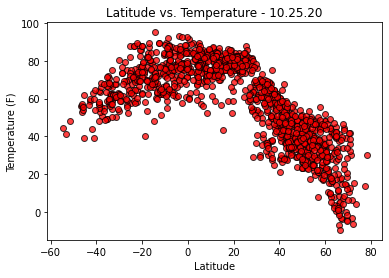

In [28]:
# Set Axises
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Temperature (F)"]

# Create Scatter Plot
fig_1 = plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Temperature - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

fig_1.figure.savefig('lat_v_temp.png')

print("This plot is comparing the latitude and temperature of each city in the data frame. We can see that as latitude is closer to zero, the equator, the higher the temperature is.")

plt.show

## Latitude vs. Humidity Plot

This plot is comparing the latitude and humidity of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

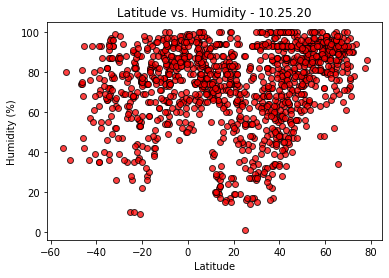

In [29]:
# Set Axises
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Humidity (%)"]

# Create Scatter Plot
fig_2 = plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Humidity - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

fig_2.figure.savefig('lat_v_humid.png')

print("This plot is comparing the latitude and humidity of each city in the data frame. There does not seem to be much of a relationship.")



plt.show

## Latitude vs. Cloudiness Plot

This plot is comparing the latitude and cloudiness of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

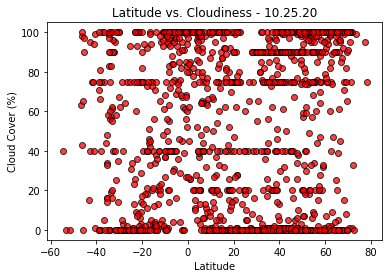

In [30]:
# Set Axises
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Cloud Cover (%)"]

# Create Scatter Plot
fig_3 = plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Cloudiness - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover (%)")

fig_3.figure.savefig('lat_v_cloud.png')


print("This plot is comparing the latitude and cloudiness of each city in the data frame. There does not seem to be much of a relationship.")



plt.show

## Latitude vs. Wind Speed Plot

This plot is comparing the latitude and wind speed of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

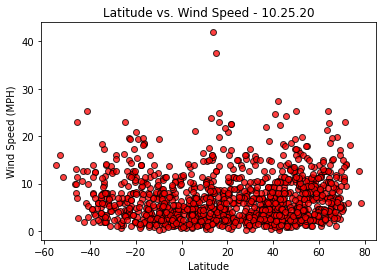

In [31]:
# Set Axises
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Wind Speed (MPH)"]

# Create Scatter Plot
fig_4 = plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Wind Speed - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

fig_4.figure.savefig('lat_v_wind.png')


print("This plot is comparing the latitude and wind speed of each city in the data frame. There does not seem to be much of a relationship.")




plt.show

## Linear Regression

In [32]:
# Set Clean City DF to North and South Hemispheres
north_hem = clean_city_data[clean_city_data["Latitude"] > 0]
south_hem = clean_city_data[clean_city_data["Latitude"] < 0]
print("Total number of unique cities in Northern Hemisphere is: " + str(len(north_hem.index)))
print("Total number of unique cities in Southern Hemisphere is: " + str(len(south_hem.index)))

Total number of unique cities in Northern Hemisphere is: 916
Total number of unique cities in Southern Hemisphere is: 363


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.87
This plot is comparing the latitude and temperature of each city in the data frame. We can see that as latitude is closer to zero, the equator, the higher the temperature is.


<function matplotlib.pyplot.show(*args, **kw)>

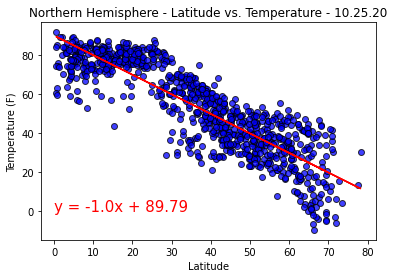

In [33]:
# Set Axises

x_axis = north_hem["Latitude"]
y_axis = north_hem["Temperature (F)"]

# Create Scatter Plot
fig_5 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Northern Hemisphere - Latitude vs. Temperature - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")


# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")




fig_5.figure.savefig('n_hem_lat_v_temp.png')

print("This plot is comparing the latitude and temperature of each city in the data frame. We can see that as latitude is closer to zero, the equator, the higher the temperature is.")

plt.show

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.63
This plot is comparing the latitude and temperature of each city in the data frame. We can see that as latitude is closer to zero, the equator, the higher the temperature is.


<function matplotlib.pyplot.show(*args, **kw)>

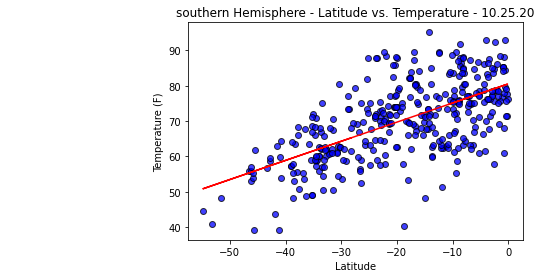

In [34]:
# Set Axises

x_axis = south_hem["Latitude"]
y_axis = south_hem["Temperature (F)"]

# Create Scatter Plot
fig_6 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("southern Hemisphere - Latitude vs. Temperature - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")


# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-90, 90),fontsize=15,color="red")




fig_6.figure.savefig('s_hem_lat_v_temp.png')

print("This plot is comparing the latitude and temperature of each city in the data frame. We can see that as latitude is closer to zero, the equator, the higher the temperature is.")

plt.show

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.27
This plot is comparing the latitude and humidity of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

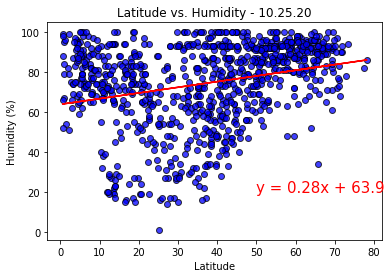

In [35]:
# Set Axises
x_axis = north_hem["Latitude"]
y_axis = north_hem["Humidity (%)"]

# Create Scatter Plot
fig_7 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Humidity - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")



fig_7.figure.savefig('n_hem_lat_v_humid.png')

print("This plot is comparing the latitude and humidity of each city in the data frame. There does not seem to be much of a relationship.")



plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.23
This plot is comparing the latitude and humidity of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

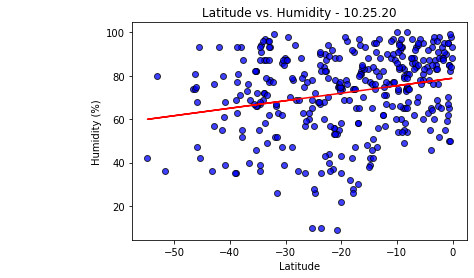

In [36]:
# Set Axises
x_axis = south_hem["Latitude"]
y_axis = south_hem["Humidity (%)"]

# Create Scatter Plot
fig_8 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Humidity - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-80,20),fontsize=15,color="red")


fig_8.figure.savefig('s_hem_lat_v_humid.png')

print("This plot is comparing the latitude and humidity of each city in the data frame. There does not seem to be much of a relationship.")



plt.show

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.14
This plot is comparing the latitude and cloudiness of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

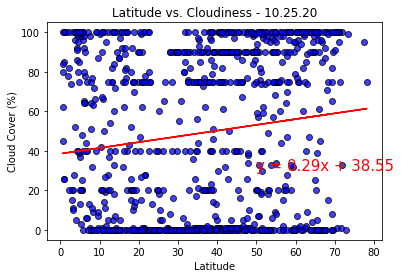

In [37]:
# Set Axises
x_axis = north_hem["Latitude"]
y_axis = north_hem["Cloud Cover (%)"]

# Create Scatter Plot
fig_9 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Cloudiness - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover (%)")

# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")



fig_9.figure.savefig('n_hem_lat_v_cloud.png')


print("This plot is comparing the latitude and cloudiness of each city in the data frame. There does not seem to be much of a relationship.")



plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.19
This plot is comparing the latitude and cloudiness of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

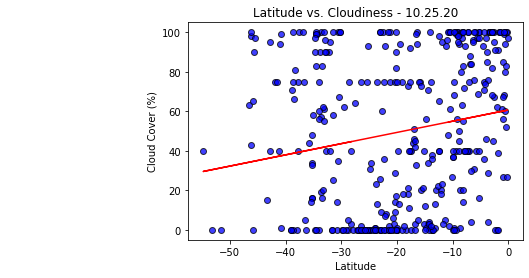

In [38]:
# Set Axises
x_axis = south_hem["Latitude"]
y_axis = south_hem["Cloud Cover (%)"]

# Create Scatter Plot
fig_10 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Cloudiness - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover (%)")

# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-90,20),fontsize=15,color="red")




fig_10.figure.savefig('s_hem_lat_v_cloud.png')


print("This plot is comparing the latitude and cloudiness of each city in the data frame. There does not seem to be much of a relationship.")



plt.show

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.13
This plot is comparing the latitude and wind speed of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

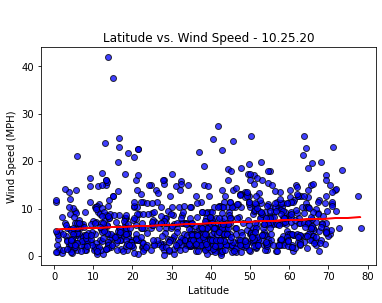

In [39]:
# Set Axises
x_axis = north_hem["Latitude"]
y_axis = north_hem["Wind Speed (MPH)"]

# Create Scatter Plot
fig_11 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Wind Speed - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")


fig_11.figure.savefig('n_hem_lat_v_wind.png')


print("This plot is comparing the latitude and wind speed of each city in the data frame. There does not seem to be much of a relationship.")




plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.26
This plot is comparing the latitude and wind speed of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

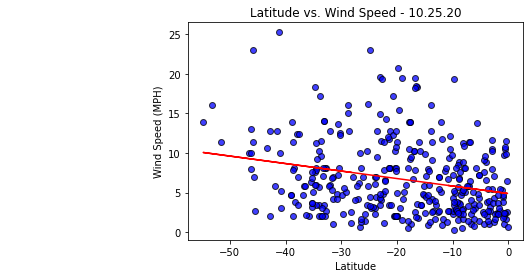

In [40]:
# Set Axises
x_axis = south_hem["Latitude"]
y_axis = south_hem["Wind Speed (MPH)"]

# Create Scatter Plot
fig_12 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Wind Speed - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-90,18),fontsize=15,color="red")


fig_12.figure.savefig('s_hem_lat_v_wind.png')


print("This plot is comparing the latitude and wind speed of each city in the data frame. There does not seem to be much of a relationship.")




plt.show